### Exercise 1

Sometimes, adaptive optimizers fail, and non-adaptive optimizers like NAG or SGD perform a lot better.  This is sometimes the case with noisy data.

In the following, I've create a simple framework to examine the behavior of different optimizers with different noise levels.  Try running with an adaptive optimizer (AdamW) and a non-adaptive optimizer (NAG / SGD) with different levels of noise.  Do you find a point with NAG starts to outperform AdamW?  What happens if you adjust learning rates?

I've written some simple code to get you started; feel free to adapt it as you see fit.

In [3]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 18.5 MB/s  0:00:15m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 53.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 52.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 45.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 41.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 64.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 45.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 56.3 MB/s  0:00:006m0:00:01
   ━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  4/25 [wheel]  WARNING: The script wheel is installed in '/usr/local/python/3.12.1/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 11/25 [ml_dtypes]]-data-server]  WARNING: The script markdown_py i

In [18]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Add noise
noise_factor = 2.5
train_images_noisy = train_images + noise_factor * np.random.normal(loc=0.0, scale=2.5, size=train_images.shape) 
test_images_noisy = test_images + noise_factor * np.random.normal(loc=0.0, scale=2.5, size=test_images.shape)

train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

X_train, y_train = train_images_noisy[:-5000], train_labels[:-5000]
X_valid, y_valid = test_images_noisy[-5000:], test_labels[-5000:]

# Define a simple neural network model
def create_and_test_model(optimizer):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_valid, y_valid))

import matplotlib.pyplot as plt

def plot_results(history,name = None):
    plt.figure(figsize=(12, 8))
    for loss in ("loss", "val_loss"):
        plt.plot(history.history[loss], label=f"{loss}", linewidth=3)

    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel({"loss": "Training loss", "val_loss": "Validation loss"}[loss])
    plt.legend(loc="upper left")
    
    plt.show()


In [19]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
history_sgd = create_and_test_model(optimizer)

Epoch 1/10


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-11-19 16:18:10.356486: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1025 - loss: 2.3973 - val_accuracy: 0.1124 - val_loss: 2.3564
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1058 - loss: 2.3456 - val_accuracy: 0.1154 - val_loss: 2.3301
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1093 - loss: 2.3253 - val_accuracy: 0.1140 - val_loss: 2.3188
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1112 - loss: 2.3149 - val_accuracy: 0.1170 - val_loss: 2.3125
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1129 - loss: 2.3089 - val_accuracy: 0.1152 - val_loss: 2.3085
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1145 - loss: 2.3050 - val_accuracy: 0.1148 - val_loss: 2.3057
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1158 - loss: 2.3025 - val_accuracy: 0.1162 - val_loss: 2.3041
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1179 - loss: 2.3006 - val_accurac

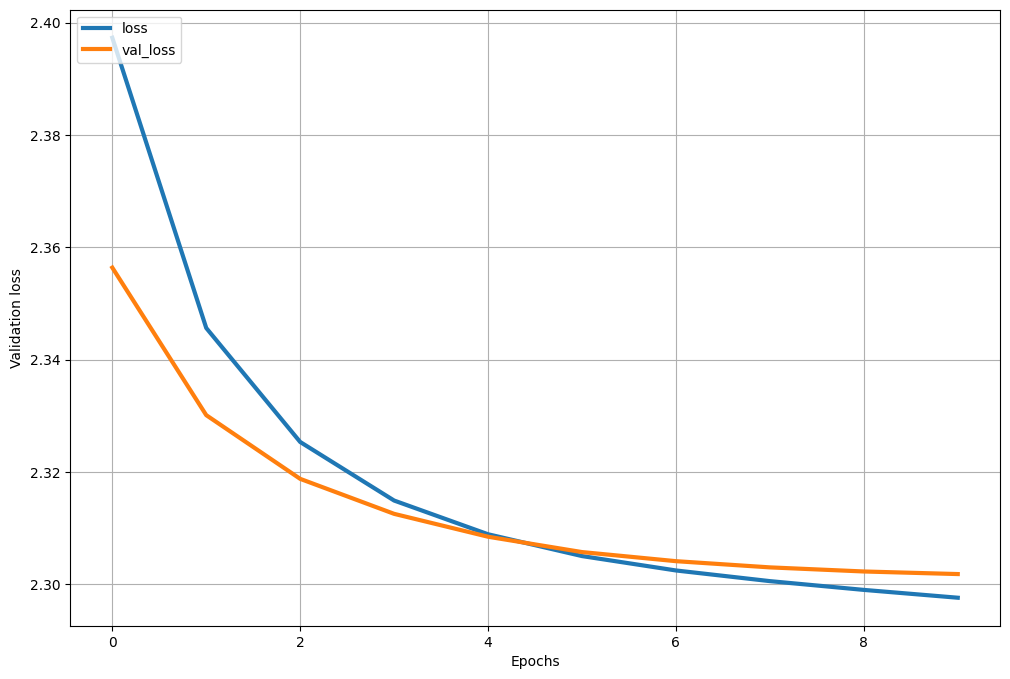

In [20]:
plot_results(history_sgd)

# Exercise 2: Parameter-Driven Regularization

In this exercise, you'll create three models with different regularization strategies and compare their performance.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7542 - loss: 0.7450 - val_accuracy: 0.8180 - val_loss: 0.5162
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8257 - loss: 0.5025 - val_accuracy: 0.8336 - val_loss: 0.4533
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8400 - loss: 0.4571 - val_accuracy: 0.8338 - val_loss: 0.4593
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8485 - loss: 0.4289 - val_accuracy: 0.8508 - val_loss: 0.4117
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8569 - loss: 0.4084 - val_accuracy: 0.8452 - val_loss: 0.4247
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8618 - loss: 0.3927 - val_accuracy: 0.8630 - val_loss: 0.3831
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8648 - loss: 0.3800 - val_accuracy: 0.8590 - val_loss: 0.3895
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8688 - loss: 0.3680 - 

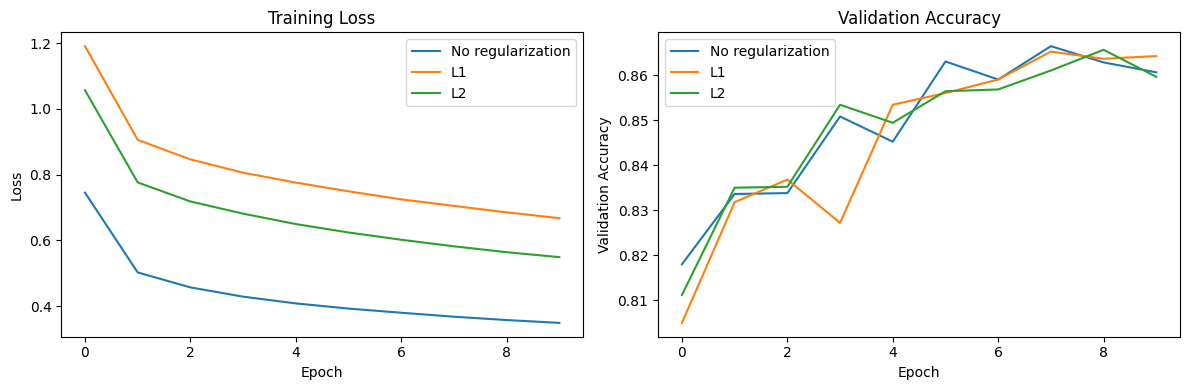

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Create a validation set
X_train = X_train_full[:-5000] / 255.0
X_valid = X_train_full[-5000:] / 255.0
X_test = X_test / 255.0

y_train = y_train_full[:-5000]
y_valid = y_train_full[-5000:]

# Exercise 1: Impact of L1 vs L2 Regularization
# -------------------------------------------


def create_model(reg_type=None, reg_rate=0.001):  # Note the smaller default reg_rate
    """
    Create a model with specified regularization.
    
    Parameters:
    reg_type: str, one of ['l1', 'l2', 'l1_l2', None]
    reg_rate: float, regularization rate
    
    Returns:
    Compiled Keras model
    """
    # TODO: Complete the regularizer selection based on reg_type
    if reg_type == 'l1':
        regularizer = tf.keras.regularizers.L1(reg_rate)
    elif reg_type == 'l2':
        regularizer = tf.keras.regularizers.L2(reg_rate)
    elif reg_type == 'l1_l2':
        regularizer = tf.keras.regularizers.L1L2(l1=reg_rate, l2=reg_rate)
    else:
        regularizer = None
    
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="relu",
                            kernel_regularizer=regularizer),
        tf.keras.layers.Dense(100, activation="relu", 
                            kernel_regularizer=regularizer),
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    
    # TODO: Complete model compilation with appropriate optimizer and learning rate
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
    
    model.compile(loss="sparse_categorical_crossentropy",
                 optimizer=optimizer,
                 metrics=["accuracy"])
    return model

def train_and_compare_models():
    """Train models with different regularization and plot results."""
    
    # TODO: Create three models with different regularization
    model_no_reg = create_model(reg_type=None)
    model_l1 = create_model(reg_type='l1', reg_rate=0.0001)
    model_l2 = create_model(reg_type='l2', reg_rate=0.001)
    
    # Train models
    history_no_reg = model_no_reg.fit(X_train, y_train, epochs=10, 
                                     validation_data=(X_valid, y_valid),
                                     verbose=1)
    history_l1 = model_l1.fit(X_train, y_train, epochs=10,
                             validation_data=(X_valid, y_valid),
                             verbose=1)
    history_l2 = model_l2.fit(X_train, y_train, epochs=10,
                             validation_data=(X_valid, y_valid),
                             verbose=1)
    
    # Plot results
    plt.figure(figsize=(12, 4))
    
    # Plot training loss
    plt.subplot(1, 2, 1)
    plt.plot(history_no_reg.history['loss'], label='No regularization')
    plt.plot(history_l1.history['loss'], label='L1')
    plt.plot(history_l2.history['loss'], label='L2')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Loss')
    
    # Plot validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history_no_reg.history['val_accuracy'], label='No regularization')
    plt.plot(history_l1.history['val_accuracy'], label='L1')
    plt.plot(history_l2.history['val_accuracy'], label='L2')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.title('Validation Accuracy')
    
    plt.tight_layout()
    plt.show()
    
    return model_no_reg, model_l1, model_l2

models = train_and_compare_models()
    

# Exercise 3: Monte Carlo Dropout

In this exercise, you'll explore how Monte Carlo Dropout can be used for uncertainty estimation in neural networks. You'll implement MC Dropout, visualize uncertainty estimates, and compare predictions with and without uncertainty estimation.

## Part 1: Setup and Data Preparation

In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Create a validation set
X_train = X_train_full[:-5000] / 255.0
X_valid = X_train_full[-5000:] / 255.0
X_test = X_test / 255.0

y_train = y_train_full[:-5000]
y_valid = y_train_full[-5000:]

# Class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Part 2: Creating an MC Dropout Model

In [23]:
class MCDropout(tf.keras.layers.Dropout):
    """Dropout layer that applies dropout at inference time."""
    def call(self, inputs):
        # TODO: Modify the call method to always apply dropout
        # Hint: Use super().call() with training=True
        return super().call(inputs, training=True)
        pass

def create_mc_model(dropout_rate=0.3):
    """Create a model with MC Dropout layers."""
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="relu"),
        MCDropout(dropout_rate),
        tf.keras.layers.Dense(100, activation="relu"),
        # TODO: Add MCDropout layer with dropout_rate
        MCDropout(dropout_rate),
        tf.keras.layers.Dense(100, activation="relu"),
        # TODO: Add MCDropout layer with dropout_rate
        MCDropout(dropout_rate),
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    
    # TODO: Compile the model
    # Your code here
    model.compile(loss="sparse_categorical_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])
    
    return model

## Part 3: Implementing Monte Carlo Predictions

In [24]:
def mc_predict(model, X, num_samples=100):
    """
    Make predictions with MC Dropout.
    
    Parameters:
    model: keras model with MC Dropout layers
    X: input data
    num_samples: number of predictions to average
    
    Returns:
    mean_pred: mean of predictions
    std_pred: standard deviation of predictions
    """
    # TODO: Generate multiple predictions and calculate statistics
    # Your code here: Use model.predict() multiple times
    # Calculate mean and standard deviation across predictions
    # Store predictions from each MC sample
    predictions = []
    
    # Generate multiple predictions with different dropout masks
    for _ in range(num_samples):
        # model.predict() uses training=False by default, but our MCDropout layer
        # overrides this to always apply dropout
        pred = model.predict(X, verbose=0)
        predictions.append(pred)
    
    # Convert to numpy array (num_samples, num_data_points, num_classes)
    predictions = np.array(predictions)
    
    # Calculate mean and std across the MC samples (axis 0)
    mean_pred = np.mean(predictions, axis=0)
    std_pred = np.std(predictions, axis=0)
    
    return mean_pred, std_pred

   

def plot_uncertainty(model, X_samples, y_true, num_samples=100):
    """Plot predictions with uncertainty bars."""
    # Get predictions and uncertainty
    mean_pred, std_pred = mc_predict(model, X_samples, num_samples)
    
    # Convert predictions to class labels and confidence
    pred_labels = np.argmax(mean_pred, axis=1)
    confidence = np.max(mean_pred, axis=1)
    uncertainty = np.mean(std_pred, axis=1)
    
    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot confidence vs uncertainty
    scatter = axes[0].scatter(confidence, uncertainty, 
                            c=(pred_labels == y_true), cmap='RdYlGn')
    axes[0].set_xlabel('Confidence (Max Probability)')
    axes[0].set_ylabel('Uncertainty (Mean Std)')
    axes[0].set_title('Confidence vs Uncertainty')
    plt.colorbar(scatter, ax=axes[0], label='Correct Prediction')
    
    # Plot correct vs incorrect predictions
    correct_conf = confidence[pred_labels == y_true]
    correct_unc = uncertainty[pred_labels == y_true]
    incorrect_conf = confidence[pred_labels != y_true]
    incorrect_unc = uncertainty[pred_labels != y_true]
    
    axes[1].hist(uncertainty[pred_labels == y_true], 
                 alpha=0.5, label='Correct', bins=20)
    axes[1].hist(uncertainty[pred_labels != y_true], 
                 alpha=0.5, label='Incorrect', bins=20)
    axes[1].set_xlabel('Uncertainty')
    axes[1].set_ylabel('Count')
    axes[1].set_title('Uncertainty Distribution')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()
    
    return mean_pred, std_pred

def visualize_uncertain_predictions(model, X_samples, y_true, num_samples=100):
    """Visualize images with their predictions and uncertainty."""
    mean_pred, std_pred = mc_predict(model, X_samples, num_samples)
    
    # Select most uncertain predictions
    uncertainty = np.mean(std_pred, axis=1)
    most_uncertain = np.argsort(uncertainty)[-5:]  # Get 5 most uncertain
    
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(most_uncertain):
        plt.subplot(1, 5, i + 1)
        plt.imshow(X_samples[idx].reshape(28, 28), cmap='binary')
        pred_label = np.argmax(mean_pred[idx])
        plt.title(f'Pred: {class_names[pred_label]}\nTrue: {class_names[y_true[idx]]}\nUnc: {uncertainty[idx]:.3f}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

## Part 4: Training and Evaluation

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7496 - loss: 0.7017 - val_accuracy: 0.8146 - val_loss: 0.5225
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8206 - loss: 0.5038 - val_accuracy: 0.8312 - val_loss: 0.4741
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8357 - loss: 0.4590 - val_accuracy: 0.8338 - val_loss: 0.4703
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8459 - loss: 0.4341 - val_accuracy: 0.8394 - val_loss: 0.4497
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8516 - loss: 0.4200 - val_accuracy: 0.8456 - val_loss: 0.4441
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8551 - loss: 0.4086 - val_accuracy: 0.8476 - val_loss: 0.4518
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8587 - loss: 0.3956 - val_accuracy: 0.8638 - val_loss: 0.4073
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8614 - loss: 0.3858 - 

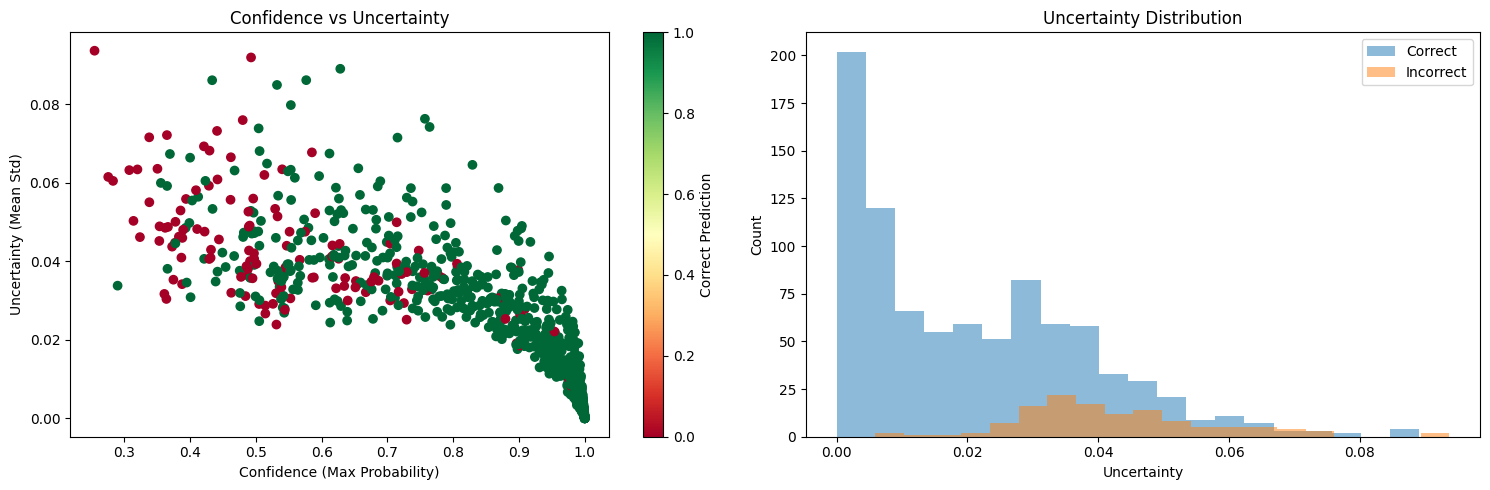

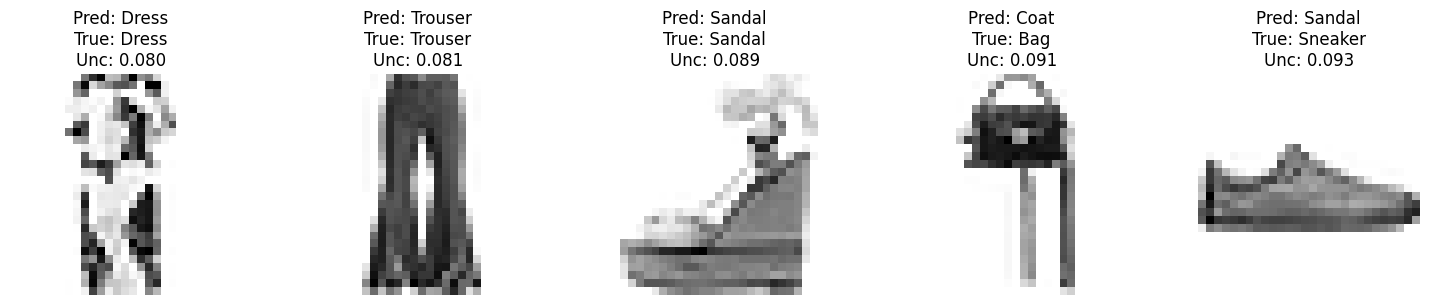

In [25]:

# Create and train model
model = create_mc_model()
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

# Evaluate on test set
test_samples = X_test[:1000]  # Using a subset for visualization
test_labels = y_test[:1000]

# Plot uncertainty analysis
plot_uncertainty(model, test_samples, test_labels)

# Visualize most uncertain predictions
visualize_uncertain_predictions(model, test_samples, test_labels)